# Exam \#2: Due end of class, November 19

**Important:** You need these files to complete this exam: 
1. exports_by_state_commodity_2002_2017.csv
2. imports_by_state_commodity_2008_2017.csv 
3. state_codes.csv
4. Madison_nonstop_routes.csv
5. US_airport_locations.csv
6. cb_2017_us_state_500k.zip


Answer the questions below in a jupyter notebook. You can simply add cells to this notebook and enter your answers. When you are finished, print the notebook and hand it in during class. Be mindful of what you choose to print. A 'head()' statement that only prints a few rows is better than printing an entire DataFrame. 

\[To print: From the file menu, choose 'print preview' which will open a new tab with the notebook ready to print. Please print on both sides of paper if possible.\]

A reminder: Ruhl's office hours are T/R 2:30PM-3:30PM in Soc Sci 7444 and McWeeny's office hours are Monday 9:30AM-11:30AM in Soc Sci 6470. Email is always welcome. 

* You may use your notes, books, and the internet
* Do not consult with other people. This work should be entirely your own. 

# Exercise 0: Your name
Replace 'Your name' above with your actual name. Enter it as last name, first name. Don't forget the comma!

# Exercise 1: Exports and imports by state

The last year has seen an increase in uncertainty about access to foreign markets. NAFTA is renegotiated, the state of trade with China is in flux, and the U.S.-E.U. trade relationship is strained. How would decreased access to foreign markets affect local economies? States that are net exporters would lose revenues and states that are net importers would lose a source of consumer goods and inputs into local industry. How exposed are states to foreign trade?

In this question we determine the state-level pattern of trade in agricultural goods. Agricultural trade is big business, so we are starting here, but the analysis could be extended to other industries. What states are agricultural net importers? Net exporters? 

### Part (a): Create the dataset

The files exports_by_state_commodity_2002_2017.csv and imports_by_state_commodity_2008_2017.csv contain data on state-level imports and exports by commodity type. An observation is total export value (or import value) for a state in a given commodity for a given year. 

The file state_codes.csv contains the two-letter state postal codes. 

1. Load the import and export data. Clean up the data as needed. 
2. Merge the export and import data to create a single DataFrame.
3. Merge the state postal codes into the DataFrame.
3. Create a variable named 'net_exports' that is equal to export value minus import value for each state-commodity-year.
4. Create two new columns: one holds log (base 10) exports and the other log (base 10) imports.  
4. Display the first 5 lines of your DataFrame.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#=============================================================================================
# Exports:

# Read the csv file for exports:
exports = pd.read_csv("exports_by_state_commodity_2002_2017.csv",header=2)
# Make column names lower case:
exports.columns = [x.lower() for x in exports.columns]
# Give some columns better names:
exports.rename(columns={'time':'year', 'total exports value ($us)':'exports'},inplace=True)
# We only have world total exports for each state and industry, so drop the 'country' column:
exports.drop('country', axis=1, inplace=True)
# Remove commas in thousands place:
exports['exports'] = exports['exports'].str.replace(',','')
# Convert to float data type
exports['exports'] = exports['exports'].astype(float)

#=============================================================================================


#=============================================================================================
# Imports: same operations, so see above for comments

imports = pd.read_csv("imports_by_state_commodity_2008_2017.csv",header=2)
imports.columns = [x.lower() for x in imports.columns]
# In this case the variable of interest is 'customs value (gen) ($us)'. Rename it to 'imports'
imports.rename(columns={'time':'year', 'customs value (gen) ($us)':'imports'},inplace=True)
imports.drop('country', axis=1, inplace=True)
imports['imports'] = imports['imports'].str.replace(',','')
imports['imports'] = imports['imports'].astype(float)

#=============================================================================================

# Merge the export and import data:
ex_im = pd.merge(left=exports, right=imports, on=['state','commodity','year'], how='inner')


# Merge the state codes
codes = pd.read_csv('state_codes.csv')
codes.loc[codes['state']=='District of Columbia','state'] = 'Dist of Columbia'
ex_im = pd.merge(left=ex_im, right = codes, on='state', how='left' )

# Calculate net exports:
ex_im['net_exports'] = ex_im['exports'] - ex_im['imports']

# Create columns containing log values. USE LOG BASE 10!!
ex_im['log_exports'] = np.log10(ex_im['exports'])
ex_im['log_imports'] = np.log10(ex_im['imports'])

ex_im.head()

,state,commodity,year,exports,imports,postal,fips,net_exports,log_exports,log_imports
0,Alabama,111 Agricultural Products,2008,472567854.0,39758950.0,AL,1,432808904.0,8.674464,7.599435
1,Alabama,111 Agricultural Products,2009,286948958.0,15946124.0,AL,1,271002834.0,8.457805,7.202655
2,Alabama,111 Agricultural Products,2010,509918522.0,19987453.0,AL,1,489931069.0,8.707501,7.300757
3,Alabama,111 Agricultural Products,2011,288732808.0,26527113.0,AL,1,262205695.0,8.460496,7.423690
4,Alabama,111 Agricultural Products,2012,141249927.0,22192730.0,AL,1,119057197.0,8.149988,7.346211


### Part (b): Create a plot

Create a scatter plot with the following features:
1. The y-axis is log exports. The range is \[5,11\]
2. The x axis is log imports. The range is \[5,11\]
3. Plot the 45-degree line as black and dashed.
4. A point on the scatter plot is the (log imports, log exports) of each state. The points that lie above the 45-degree line should be blue circles that not filled in. The points that lie below the 45-degree line should be red squares that are not filled in. 
5. Add the appropriate labels, etc. Make your figure look nice. 


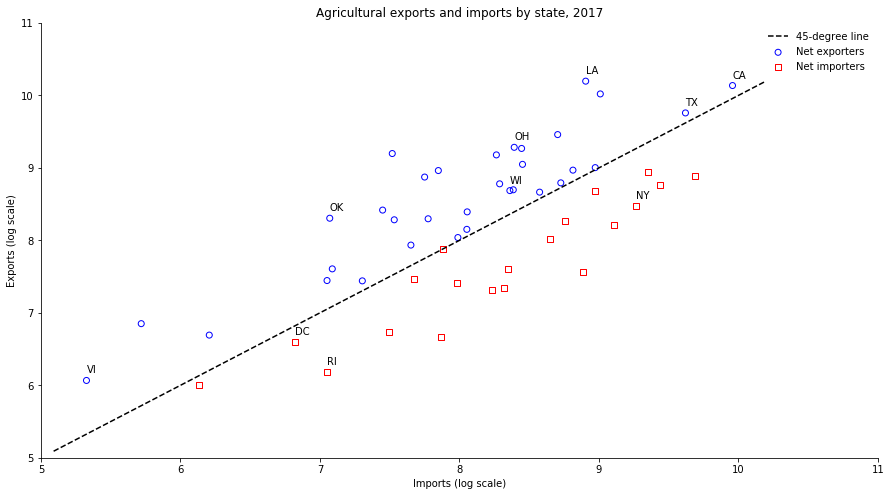

In [3]:
# Select only agricultural commodities in 2017:
ag = ex_im[(ex_im['commodity'] == '111 Agricultural Products') & (ex_im['year'] == 2017)]

# Make scatterplot showing imports, exports, and a 45 degree :
fig, ax = plt.subplots(figsize=(15,8)) 
# Scatter for net exporting states:
ax.scatter(ag.loc[ag['net_exports'] >= 0,'log_imports'],ag.loc[ag['net_exports'] >= 0,'log_exports'], color='blue', facecolors='none',label = 'Net exporters')
# Scatter for net importing states:
ax.scatter(ag.loc[ag['net_exports'] < 0,'log_imports'],ag.loc[ag['net_exports'] < 0,'log_exports'], color='red', marker = 's', facecolors='none',label = 'Net importers')

# 45-degree line:
ax.plot(ax.get_xlim(), ax.get_xlim(),color='black',linestyle='--',label = '45-degree line')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim(5,11)
ax.set_ylim(5,11)

plt.title('Agricultural exports and imports by state, 2017')
plt.xlabel('Imports (log scale)')
plt.ylabel('Exports (log scale)')

# Add the labels. Are thre better ways to do this?
states_to_label = ['OH', 'WI', 'CA', 'TX', 'NY', 'VI', 'DC', 'OK', 'LA', 'RI']

for x, y, lab in zip(ag['log_imports'], ag['log_exports'], ag['postal']):
    if lab in states_to_label:
        ax.text(x, y+0.1, lab)

plt.legend(frameon=False)

plt.show()

### Part (c): Labels

In your plot for part b, print the two-letter postal abbreviation of the state next to its data point for the following states. 

```python
states_to_label = ['OH', 'WI', 'CA', 'TX', 'NY', 'VI', 'DC', 'OK', 'LA', 'RI']
```
Do it 'programmatically'. By that I mean, do not write 10 separate statements to label 10 points. A loop might be a nice way to go. \[Or maybe there is a package floating around out there that will do it?\]

Offset the a bit in the y-dimension so that the label is not right on the data marker. 

# Exercise 2: Plotting airline routes

The goal of this exercise is to create a map of all the nonstop airline routes departing from Madison, Wisconsin in the second quarter of 2018.

The file Madison_nonstop_routes.csv contains information on the airline, destination airport, and number of passengers transported on each airline route departing from Madison. The file US_airport_locations.csv contains the latitude and longitude of every airport in the United States. Finally, the folder cb_2017_us_state_500k.zip contains the shapefiles for all U.S. states (you will need to unzip it for this exercise).

To create the map, carefully follow the instructions below.

### Part (a): Merging routes with coordinates of destination airports 
1. Load Madison_nonstop_routes.csv into a Pandas DataFrame. Then, create a new column that contains a string with the name of the desired color for each airline. Make the routes for American Airlines blue, those for Delta Air Lines red, those for United Airlines yellow, and those for Frontier Airlines green.
2. Load US_airport_locations.csv as a Pandas DataFrame. Then merge this DataFrame with the DataFrame created in (1) using `airport_id` as the key. Name the resulting Dataframe `merged`. Make sure you only keep the observations corresponding to the nonstop destinations from Madison.
3. In the merged data frame, rename the column `'longitude'` to `'dest_lon'` and the column `'latitude'` to `'dest_lat'`.


In [4]:
import pandas as pd
import geopandas    
from shapely.geometry import Point
import matplotlib.pyplot as plt  

In [5]:
# Import route data:
routes = pd.read_csv("Madison_nonstop_routes.csv")

# Create desired colors:
routes.loc[routes['airline'] == "American Airlines", 'color'] = "blue"
routes.loc[routes['airline'] == "Delta Air Lines", 'color'] = "red"
routes.loc[routes['airline'] == "United Airlines", 'color'] = "yellow"
routes.loc[routes['airline'] == "Frontier Airlines", 'color'] = "green"

# Import airport location data:
airports = pd.read_csv("US_airport_locations.csv")

# Merge on airport_id:
merged = pd.merge(left=routes, right=airports, on='airport_id', how='left')

# Rename columns:
merged.rename(columns={'longitude':'dest_lon','latitude':'dest_lat'}, inplace=True)


4. As we did in class, create a column called `'dest_coord'` containing a list of each observation's longitude and latitude corrdinates. \[Hint: We used zip().\]
5. Convert `'dest_coord'` to  Point objects. 
6. The longitude of Madison's airport is -89.3375 degrees, and its latitude is 43.14 degrees. In the data frame `merged`, create columns named `'origin_lon'` and `'origin_lat'` to contain these points.
7. Later on, it will be useful to have two columns in the merged dataframe: one containing the longitude points of both the origin and destination and one containing the latitude points of the origin and destination. Name the columns `'longitude_pair'` and `'latitude_pair'`. The code for creating the longitude column should look something like
```python
merged['longitude_pair'] = list(zip(merged['origin_lon'], merged['dest_lon']))
```

In [6]:
# Create a point object for the destination coordinates:
merged['dest_coord'] = list(zip(merged['dest_lon'], merged['dest_lat']))
merged['dest_coord'] = merged['dest_coord'].apply(Point)

# Coordinates of Dane County Regional Airport:
MSN_lon = -89.3375
MSN_lat = 43.14
merged['origin_lon'] = MSN_lon
merged['origin_lat'] = MSN_lat

# Create columns useful for plotting later:
merged['longitude_pair'] = list(zip(merged['origin_lon'], merged['dest_lon']))
merged['latitude_pair'] = list(zip(merged['origin_lat'], merged['dest_lat']))

### Part (b): Importing the state shapefiles

1. Import the shapefile for states as a GeoDataFrame. Convert the column names to lower case.
2. Note that the file contains the outlines of serveral territories in addition to the 50 states. We do not need these, and nor do we need Alaska or Hawaii. Thus, in the state data, drop the observations for which `'stusps'` is equal to 'GU', 'MP', 'AS', 'PR', 'VI', 'AK', or 'HI'.

In [7]:
states = geopandas.read_file('cb_2017_us_state_500k\cb_2017_us_state_500k.shp')
states.columns = [x.lower() for x in states.columns]
territories = ['GU','MP','AS','PR','VI','AK','HI']
states = states[~(states['stusps'].isin(territories))] # Drop unneeded states and terrotories

### Part (c): Making the map

1. Plot the outlines of all the states. Make the edges of each state black but make the fill color of each state tan.
2. Convert `merged` to a GeoDataFrame called `gdf` with `'dest_coord'` as the geometry. Then, plot the location of each of these destination airports as a black dot on the map.
3. Use the `.annotate()` function to label each destination with the appropriate `'airport_id'`. This will require a for-loop.
4. Now we need to plot a line between Madison and each destination for each nonstop route for each airline. 
    1. Wite a for-loop to plot a line corresponding to each route in the `merged` data frame. Then, for each observation, pass the values in the columns `'longitude_pair'` and `'latitude_pair'` to the `.plot()` function.
    2. Make a legend describing the color of the line for each airline. **Make sure the legend shows each airline only once! HINT: This will require some clever if-else statements within the for-loop!** 
5. Finally, plot the location of Madison's airport as a black square and label this point 'MSN'. Remove the axis spines and add an appropriate title for the figure.

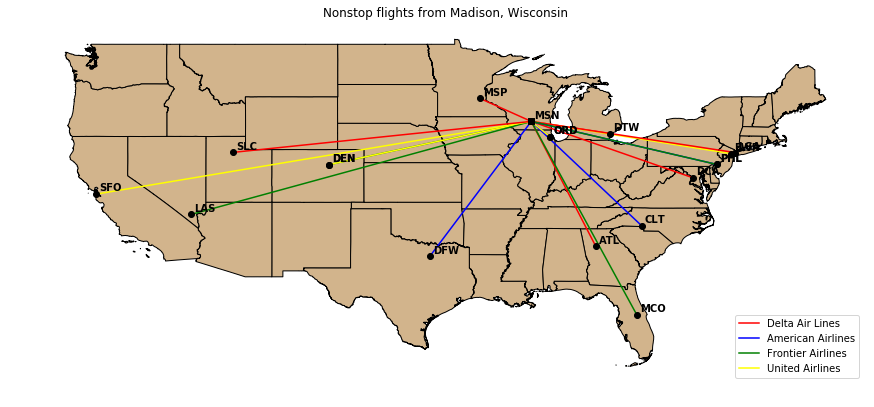

In [12]:
fig, gax = plt.subplots(figsize=(15,10))

# Plot all the states:
states.plot(ax = gax, edgecolor='black',color='tan')

# Make GeoDataFrame:
gdf = geopandas.GeoDataFrame(merged, geometry='dest_coord')

# Make a dot for each destination airport:
gdf.plot(ax=gax,color='black',zorder=3)

# Label each destination airport:        
for x, y, label in zip(gdf['dest_coord'].x, gdf['dest_coord'].y, gdf['airport_id']):
    gax.annotate(label, xy=(x,y), xytext=(3,3), weight='bold', textcoords='offset points',color='black')
    
# Plot lines with different colors for each airline:
airline_list = []
for index, row in merged.iterrows():
    
    airline_name = merged.loc[index,'airline'] # Get name of current airline
    
    if airline_name not in airline_list: # Check whether current airline has already been added to the legend.
        # Plot the route and add the airline to the legend using label=airline_name:
        gax.plot(merged.loc[index,'longitude_pair'],merged.loc[index, 'latitude_pair'],color=merged.loc[index,'color'],label=airline_name)
        
        # Add name of current airline to the list of airlines that have been added to the legend
        airline_list.append(airline_name) 
    
    else: # This means the current airline has already been added to the legend, so we 
          # remove label=airline_name from the .plot() command:
        gax.plot(merged.loc[index,'longitude_pair'],merged.loc[index, 'latitude_pair'],color=merged.loc[index,'color'])

# Label Madison's airport:
gax.scatter(x=MSN_lon,y=MSN_lat,marker = 's',color='black',zorder=3)
gax.annotate("MSN", xy=(-89.3375,43.14), xytext=(3,3), weight='bold', textcoords='offset points',color='black')
    
plt.title("Nonstop flights from Madison, Wisconsin") 
plt.legend(loc='lower right')
plt.axis('off')
plt.savefig('map.pdf')
plt.show()


Note that, in reality, the routes are not straight lines because the Earth is round but the map is flat. Ideally, we would plot minor arcs of great circles, but this is difficult to do without additional packages. If you are interested in learning about this, drop Dennis an email!